# Capstone Project: Applying Machine Learning to the Crime and Dispatch datasets 

In [5]:
import os as os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [6]:
from datetime import datetime

## file uploads

In [10]:
file_path_dispatch = "/Users/gimle/DATA-205-SETS/Police_Dispatched_Incidents_20240906 copy.csv"


In [12]:
file_path_crime = "/Users/gimle/DATA-205-SETS/Crime_20240906 copy.csv"


In [14]:
file_path_census = "/Users/gimle/DATA-205-SETS/DECENNIALDHC2020.P1-Data copy.csv"


In [16]:
if os.path.exists(file_path_dispatch): 
    dispatch = pd.read_csv(file_path_dispatch)
    print("dispatch created")
   
else: 
    print("youve got fix the dispatch filepath") 
    
if os.path.exists(file_path_crime): 
    crime = pd.read_csv(file_path_crime)
    print("crime created")
   
else: 
    print("youve got fix the crime filepath")
    
if os.path.exists(file_path_census): 
    census = pd.read_csv(file_path_census)
    print("crime created")
   
else: 
    print("youve got fix the census filepath") 

/var/folders/vt/8zqwv5_51777lk_0p42g3sdr0000gn/T/ipykernel_39211/2466321656.py:2: DtypeWarning: Columns (11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  dispatch = pd.read_csv(file_path_dispatch)


dispatch created
crime created
crime created


# Formatting and naming the census correctly 
Upploaded wrong census file. 
This one does not contain polygons 

In [18]:
census.columns

Index(['GEO_ID', 'NAME', 'P1_001N', 'Unnamed: 3'], dtype='object')

In [19]:
census.head(3)

,GEO_ID,NAME,P1_001N,Unnamed: 3
0,Geography,Geographic Area Name,!!Total,NaN
1,1000000US240317001011000,"Block 1000, Block Group 1, Census Tract 7001.0...",215,NaN
2,1000000US240317001011001,"Block 1001, Block Group 1, Census Tract 7001.0...",237,NaN


# Exploratory Data analysis

In [21]:
crime.head(3)

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,Start_Date_Time,End_Date_Time,NIBRS Code,Victims,Crime Name1,Crime Name2,...,PRA,Address Number,Street Prefix,Street Name,Street Suffix,Street Type,Latitude,Longitude,Police District Number,Location
0,201403032,5404,220052381,11/27/2022 11:52:08 PM,11/27/2022 11:52:00 PM,NaN,90D,1,Crime Against Society,Driving Under the Influence,...,594,NaN,NaN,MATENY,NaN,RD,39.15682,-77.2665,5D,"(39.1568, -77.2665)"
1,201359823,5404,220000965,01/09/2022 01:18:38 AM,01/09/2022 01:34:00 AM,NaN,90D,1,Crime Against Society,Driving Under the Influence,...,428,100.0,N,FREDERICK,NaN,AVE,39.09438,-77.1517,6D,"(39.0944, -77.1517)"
2,201360056,2304,220001336,01/12/2022 02:53:25 AM,01/12/2022 02:53:00 AM,01/12/2022 03:00:00 AM,23G,1,Crime Against Property,Theft of Motor Vehicle Parts or Accessories,...,293,1600.0,NaN,BRADLEY,NaN,AVE,39.08126,-77.1205,1D,"(39.0813, -77.1205)"


In [22]:
dispatch.head(3)

,Incident_ID,Crime Reports,Crash Reports,Start Time,End Time,Priority,Initial Type,Close Type,Address,City,...,PRA,CallTime CallRoute,Calltime Dispatch,Calltime Arrive,Calltime Cleared,CallRoute Dispatch,Dispatch Arrive,Arrive Cleared,Disposition Desc,Location
0,P1700827460,170547273,NaN,12/07/2017 11:27:39 PM,12/08/2017 04:03:37 AM,0,BURGLARY,BURGLARY,100 BLK TEACHERS WAY,GAITHERSBURG,...,419.0,78.0,99.0,121.0,16557.0,20.0,21.0,16436.0,ROBFIREARM-RESIDENTIAL,POINT (-77.193 39.1432)
1,P1700834957,170548471,NaN,12/14/2017 04:29:38 AM,12/14/2017 07:50:08 AM,1,DOMESTIC DISTURBANCE/VIOLENCE,DOMESTIC DISTURBANCE/VIOLENCE,12100 BLK SIOUX PL,GAITHERSBURG,...,591.0,133.0,197.0,591.0,12029.0,64.0,394.0,11438.0,MENTALTRANSPORT,POINT (-77.2524 39.1284)
2,P1900298804,190043080,NaN,09/08/2019 08:55:02 PM,09/09/2019 05:13:44 AM,0,ROBBERY JUST OCCURRED,ROBBERY JUST OCCURRED,13700 BLK CONNECTICUT AVE,SILVER SPRING,...,337.0,147.0,218.0,351.0,29921.0,71.0,132.0,29570.0,LARCNYSHOPLFTNG$50-$199,POINT (-77.0808 39.0789)


In [23]:
crime.columns

Index(['Incident ID', 'Offence Code', 'CR Number', 'Dispatch Date / Time',
       'Start_Date_Time', 'End_Date_Time', 'NIBRS Code', 'Victims',
       'Crime Name1', 'Crime Name2', 'Crime Name3', 'Police District Name',
       'Block Address', 'City', 'State', 'Zip Code', 'Agency', 'Place',
       'Sector', 'Beat', 'PRA', 'Address Number', 'Street Prefix',
       'Street Name', 'Street Suffix', 'Street Type', 'Latitude', 'Longitude',
       'Police District Number', 'Location'],
      dtype='object')

In [24]:
dispatch.columns

Index(['Incident_ID', 'Crime Reports', 'Crash Reports', 'Start Time',
       'End Time', 'Priority', 'Initial Type', 'Close Type', 'Address', 'City',
       'State', 'Zip', 'Longitude', 'Latitude', 'Police District Number',
       'Beat', 'PRA', 'CallTime CallRoute', 'Calltime Dispatch',
       'Calltime Arrive', 'Calltime Cleared', 'CallRoute Dispatch',
       'Dispatch Arrive', 'Arrive Cleared', 'Disposition Desc', 'Location'],
      dtype='object')

# Removing columns
The Beats, PRA's and Police district names can be determined from the location data, which I can fit back on in Arc GIS. Identifying the mismatches would not necessarily make for interesting results after converations with dataMontgomery
I am instead going to normalise incidents against census block data instead of either BEAT and PRA. 
Zip, state as well as other street identifiers are also not as relevant due to the existence of coordinate data. 

With regards to NIBRS codes, similar if not identical categories are represented in the crime name 2 column. 

In the case of Dispatch data the Calltimes have been removed as they will require methods I am not currently able to apply. 

In [26]:
crime.drop(['Block Address', 'City', 'State','Zip Code', 'Address Number', 'Street Prefix',
       'Street Name', 'Street Suffix', 'Street Type','Location','Beat','Sector', 'NIBRS Code', 'Police District Name'], axis=1, inplace=True) 

In [27]:
dispatch.drop(['Crash Reports','Address','City', 'State', 'Zip', 'Location',
               'Beat','Disposition Desc','CallTime CallRoute','Calltime Dispatch','Calltime Arrive',
               'Calltime Arrive','Calltime Cleared','CallRoute Dispatch','Dispatch Arrive' ], axis=1, inplace=True) 

In [28]:
dispatch.isna().sum() 

Incident_ID                    0
Crime Reports             654675
Start Time                     0
End Time                       1
Priority                       0
Initial Type                   0
Close Type                     0
Longitude                     27
Latitude                      27
Police District Number         1
PRA                          202
Arrive Cleared            180252
dtype: int64

In [29]:
crime.isna().sum() 

Incident ID                    0
Offence Code                   0
CR Number                      0
Dispatch Date / Time       46646
Start_Date_Time                0
End_Date_Time             162161
Victims                        0
Crime Name1                    0
Crime Name2                    0
Crime Name3                    0
Agency                         0
Place                          0
PRA                            6
Latitude                       0
Longitude                      0
Police District Number         0
dtype: int64

In [30]:
# Checking types
print(dispatch.dtypes)

Incident_ID                object
Crime Reports              object
Start Time                 object
End Time                   object
Priority                    int64
Initial Type               object
Close Type                 object
Longitude                 float64
Latitude                  float64
Police District Number     object
PRA                        object
Arrive Cleared            float64
dtype: object


In [31]:
# Checking types
print(crime.dtypes)

Incident ID                 int64
Offence Code                int64
CR Number                   int64
Dispatch Date / Time       object
Start_Date_Time            object
End_Date_Time              object
Victims                     int64
Crime Name1                object
Crime Name2                object
Crime Name3                object
Agency                     object
Place                      object
PRA                        object
Latitude                  float64
Longitude                 float64
Police District Number     object
dtype: object


In [32]:
count_crime_1 = len(crime)
count_dispatch_1 = len(dispatch)
print(count_crime_1)
print(count_dispatch_1) 

318012
786255


In [33]:
dispatch.dropna(subset=['Longitude','Latitude',], inplace = True)
crime.dropna(subset=['End_Date_Time','Longitude','Latitude'], inplace = True)

# Fixing time and removing all entries prior to 2018
Both datasets are needlessly large and cover too much time and too many changes to internal reporting procedure. It is therefore essential to cut down the size of the dataset we are working with. 

In [44]:
# Reformatting all time and date columns
crime['Dispatch Date / Time'] = pd.to_datetime(crime['Dispatch Date / Time'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
crime["Start_Date_Time"] = pd.to_datetime(crime['Start_Date_Time'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
crime['End_Date_Time'] = pd.to_datetime(crime['End_Date_Time'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

dispatch['Start Time'] = pd.to_datetime(dispatch['Start Time'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
dispatch['End Time'] = pd.to_datetime(dispatch['End Time'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
print("done")

done


In [50]:
# Renaming for easy of use
crime.rename(columns={"Start_Date_Time": 'Start_Time'}, inplace=True)
crime.rename(columns={'Dispatch Date / Time': 'Dispatch_Time'}, inplace=True)
crime.rename(columns={"End_Date_Time": 'End_Time'}, inplace=True)
dispatch.rename(columns={'Start Time': 'Start_Time'}, inplace=True)
dispatch.rename(columns={'End Time': 'End_Time'}, inplace=True)
dispatch.rename(columns={'Inital Type': 'Inital_Type'}, inplace=True)
dispatch.rename(columns={'End Time': 'End_Time'}, inplace=True)
print("done")

done


In [52]:
# Cutoff is set from the 1st of June 2018 to 1st of June 2024 because of changes to underlying systems were made in 2018. Crime reports can also take some time to be registered in the systems, and as such a cutoff at the end is more representative. 
crime = crime[(crime['Start_Time'] >= datetime(2018, 6, 1)) &
            (crime['Start_Time'] <= datetime(2024, 6, 1))]
dispatch = dispatch[(dispatch['Start_Time'] >= datetime(2018, 6, 1)) & 
                    (dispatch['Start_Time'] <= datetime(2024, 6, 1))] 
print("done")

done


In [53]:
count_crime_2 = len(crime)
count_dispatch_2 = len(dispatch)
print(count_crime_2)
print(count_dispatch_2) 

120689
637724


# Fixing location point data for easier use in ARC GIS 
This is much easier to do in while the datasets are seperate

In [55]:
crime['WKT'] = crime.apply(lambda row: f"POINT ({row['Longitude']} {row['Latitude']})", axis=1)
dispatch['WKT'] = dispatch.apply(lambda row: f"POINT ({row['Longitude']} {row['Latitude']})", axis=1)
print("done")

done


In [56]:
dispatch.nunique()

Incident_ID               637724
Crime Reports             110454
Start_Time                635771
End_Time                  635741
Priority                       5
Initial Type                 219
Close Type                   216
Longitude                  15134
Latitude                   34368
Police District Number         9
PRA                         1551
Arrive Cleared             17570
WKT                        64819
dtype: int64

In [57]:
print(crime['Agency'].unique())

['RCPD' 'MCPD' 'GPD' 'TPPD' 'MCSO' 'MCFM' 'OTHR']


In [58]:
print(crime['Crime Name1'].unique())

['Crime Against Property' 'Crime Against Society' 'Crime Against Person'
 'Crime Against Not a Crime' 'Crime Against Person, Property, or Society']


In [59]:
set1 = set(dispatch['Close Type'])
set2 = set(dispatch['Initial Type'])

if set1 == set2:
    print("same.")
else:
    print("They're different.")
    print("only in Close Type ", set1 - set2)
    print("Only in Initial Type", set2 - set1)

They're different.
only in Close Type  {'10 SIGNAL ALARM', 'RAPEJA', 'TC - TRAFFIC COLLISION ON PATROL', 'ALARMT', 'ATT - ATTACHMENT ON PATROL'}
Only in Initial Type {'SUM - SUMMONS SERVICE', 'TRE - TRESP ON PATROL', 'RAPEA', 'HUNTO - HUNTING OCCURRED EARLIER - ILLEGAL - OCCURRED EARLIER', 'OVERDOSE - VIA FRS - OCCURRED EARLIER', 'WR - WRITING REPORT', 'REFERRED TO OAS', 'ALARMF - FARS'}


In [60]:
incongruence = dispatch[dispatch['Close Type'] != dispatch['Initial Type']]
print(incongruence.shape[0])

16855


In [61]:
# Category mapping for places in the crime dataset
# If I am to one hot encode places for machine learning purposes, then they have to be simplified 

place_map = {
    
    'Cyberspace': 'Other',
    'Other/Unknown': 'Other',

    'Hotel/Motel/Etc.': 'Hospitality',
    'Restaurant': 'Hospitality',
    'Bar/Night Club': 'Hospitality',

    'Hospital/Emergency Care Center': 'Medical Facility',
    'Doctor/Dentist/Vet Office': 'Medical Facility',

    'Residence - Driveway': 'Residential Areas',
    'School - Elementary/Secondary': 'Educational Facilities',

    'Commercial - Industrial Park': 'Commercial Area',
    'Commercial - Office Building': 'Commercial Area',
    'Auto Dealership': 'Commercial Area',
    'Auto Repair': 'Commercial Area',
    'Construction Site': 'Commercial Area',
    'Industrial Site': 'Commercial Area',
    'Rental Storage Facility': 'Commercial Area',
    'Farm Facility': 'Commercial Area',
    'Dock/Wharf/Freight/Modal Terminal': 'Commercial Area',
    'Abandoned/Condemned Structures': 'Abandoned Structure',

    'Library': 'Public Space',
    'Church/Synagogue/Temple': 'Public Space',
    'Community Center': 'Public Space',
    'Recreation Center': 'Public Space',
    'Shelter-Mission/Homeless': 'Public Space',
    'Field/Open Space': 'Public Space',
    'Arena/Stadium/Fairgrounds/Coliseum': 'Public Space',
    'Golf Course': 'Public Space',
    'Lake/Waterway': 'Public Space',
    'Amusement Park': 'Public Space',
    'Pool': 'Public Space',
    'Theater': 'Public Space',

    'Government Building': 'Government Building',

    'Rest Area': 'Park or Rest Area',
    'Park': 'Park or Rest Area',

    'Parking Lot - Residential': 'Parking Lot',
    'Parking Garage - Residential': 'Parking Lot',
    'Parking Lot - Commercial': 'Parking Lot',
    'Parking Garage - Commercial': 'Parking Lot',
    'Parking Lot - Other': 'Parking Lot',
    'Parking Lot - Metro': 'Parking Lot',
    'Parking Lot - Park & Ride': 'Parking Lot',
    'Parking Garage - Metro': 'Parking Lot',
    'Parking Garage - County': 'Parking Lot',
    'Parking Garage - Other': 'Parking Lot',
    'Parking Lot - School': 'Parking Lot',
    'Parking Lot - Rec Center': 'Parking Lot',
    'Parking Lot - Church': 'Parking Lot',
    'Parking Lot - County': 'Parking Lot',

    'Street - Alley': 'Street',
    'Street - Other': 'Street',
    'Street - In vehicle': 'Street',
    'Street - Residential': 'Street',
    'Street - Commercial': 'Street',

    'Air/Bus/Train/Metro Terminal': 'Public Transit Area',
    'Street - Bus Stop': 'Public Transit Area',
    'Pedestrian Tunnel': 'Public Transit Area',

    'Grocery/Supermarket': 'Retail',
    'Gas Station': 'Retail',
    'Retail - Department/Discount Store': 'Retail',
    'Retail - Drug Store/Pharmacy': 'Retail',
    'Retail - Clothing': 'Retail',
    'Retail - Hardware': 'Retail',
    'Retail - Appliances/Electronics': 'Retail',
    'Retail - Mall': 'Retail',
    'Convenience Store': 'Retail',
    'Retail - Jewelry': 'Retail',
    'Retail - Sporting Goods': 'Retail',
    'Retail - Salon/Spa': 'Retail',
    'Retail - Beauty/Barber Shop': 'Retail',
    'Retail - Dry Cleaner': 'Retail',
    'Retail - Video Store': 'Retail',
    'Pawn Shop': 'Retail',
    'Check Cashing Est.': 'Retail',

    'Liquor Store - Beer & Wine': 'Liquor Store',
    'Liquor Store - County': 'Liquor Store',

    'School - Elementary/Secondary': 'School/Childcare',
    'School - College/University': 'School/Childcare',
    'Daycare Facility': 'School/Childcare',
    'Nursery': 'School/Childcare',

    'Residence - Driveway': 'Residence',
    'Residence - Single Family': 'Residence',
    'Residence - Apartment/Condo': 'Residence',
    'Residence - Townhouse/Duplex': 'Residence',
    'Residence - Carport': 'Residence',
    'Residence - Garage': 'Residence',
    'Residence - Nursing Home': 'Residence',
    'Residence - Shed': 'Residence',
    'Residence - Yard': 'Residence',
    'Residence - Other': 'Residence',
    'Residence - Apt Ofc/Storage': 'Residence',
    'Residence - Mobile Home': 'Residence',
}

crime['Place'] = crime['Place'].map(place_map)


In [62]:
dispatch.head(10)

,Incident_ID,Crime Reports,Start_Time,End_Time,Priority,Initial Type,Close Type,Longitude,Latitude,Police District Number,PRA,Arrive Cleared,WKT
2,P1900298804,190043080,2019-09-08 20:55:02,2019-09-09 05:13:44,0,ROBBERY JUST OCCURRED,ROBBERY JUST OCCURRED,-77.0808,39.07891,4D,337.0,29570.0,POINT (-77.0808 39.07891)
3,P2300144616,230025147,2023-05-25 17:31:19,2023-05-25 18:40:38,2,STATION RESPONSE,STATION RESPONSE,-76.9920,39.04565,3D,148.0,2883.0,POINT (-76.992 39.04565)
4,P2200257544,220041666,2022-09-24 18:07:43,2022-09-24 19:45:55,3,SEXUAL ASSAULT - OCCURRED EARLIER,SEXUAL ASSAULT - OCCURRED EARLIER,-77.2019,39.28374,5D,615.0,4211.0,POINT (-77.2019 39.28374)
5,P2200187281,220030203,2022-07-14 08:21:26,2022-07-14 08:59:05,4,THEFT/LARCENY - OCCURRED EARLIER,THEFT/LARCENY - OCCURRED EARLIER,-77.1424,39.09371,1D,287.0,1852.0,POINT (-77.1424 39.09371)
6,P2300063561,230011226,2023-03-07 14:59:33,2023-03-07 19:29:02,1,DECEASED PERSON,DECEASED PERSON,-77.0867,39.04830,4D,310.0,11648.0,POINT (-77.0867 39.0483)
7,P2200341895,220056382,2022-12-20 09:19:19,2022-12-20 12:22:06,4,THEFTT - TRS THEFT/LARCENY - TELEPHONE REPORTI...,THEFT/LARCENY - OCCURRED EARLIER,-77.1392,39.07914,1D,295.0,8462.0,POINT (-77.1392 39.07914)
8,P2200063785,220010684,2022-03-12 10:06:10,2022-03-12 14:04:50,0,ROBBERY,ROBBERY JUST OCCURRED,-77.0030,39.07369,4D,677.0,13732.0,POINT (-77.003 39.07369)
9,P2300009459,230001629,2023-01-11 01:19:21,2023-01-11 02:15:53,2,THEFT/LARCENY,THEFT/LARCENY,-77.0696,39.09016,4D,348.0,2419.0,POINT (-77.0696 39.09016)
10,P2100285953,210045180,2021-11-08 08:38:34,2021-11-08 09:56:34,2,STATION RESPONSE,STATION RESPONSE,-76.9919,39.04557,3D,148.0,3595.0,POINT (-76.9919 39.04557)
11,P2100221587,210034508,2021-09-03 07:15:47,2021-09-03 08:32:33,4,THEFT/LARCENY - OCCURRED EARLIER,THEFT/LARCENY - OCCURRED EARLIER,-77.1356,39.07867,1D,295.0,3986.0,POINT (-77.1356 39.07867)


In [63]:
dispatch.isna().sum() 

Incident_ID                    0
Crime Reports             527270
Start_Time                     0
End_Time                       1
Priority                       0
Initial Type                   0
Close Type                     0
Longitude                      0
Latitude                       0
Police District Number         0
PRA                          142
Arrive Cleared            148406
WKT                            0
dtype: int64

In [64]:
crime.isna().sum() 

Incident ID                  0
Offence Code                 0
CR Number                    0
Dispatch_Time             5630
Start_Time                   0
End_Time                     0
Victims                      0
Crime Name1                  0
Crime Name2                  0
Crime Name3                  0
Agency                       0
Place                     6639
PRA                          0
Latitude                     0
Longitude                    0
Police District Number       0
WKT                          0
dtype: int64

# Joining the datasets: 
Here joining the crime and dispatch datasets, keeping all
This is done by first fixing the names of the ID column which in the crime dataset is called CR number and in the dispatch dataset is called crime reports

In [66]:
crime.rename(columns={'CR Number': 'ID'}, inplace=True)
dispatch.rename(columns={'Crime Reports': 'ID'}, inplace=True)

In [67]:
crime.rename(columns={'Incident ID': 'Incident_ID'}, inplace=True)

In [68]:
dispatch['ID'] = pd.to_numeric(dispatch['ID'], errors='coerce').fillna(0).astype(int)
dispatch['Incident_ID'] = dispatch['Incident_ID'].str.replace('P', '').astype(int)

In [69]:
incidents = pd.merge(crime,
                     dispatch, 
                     on='ID', 
                     how='outer', 
                     suffixes=('_crime', '_dispatch'), 
                     indicator = True)

In [70]:
alternative_merge = pd.merge(crime,
                     dispatch, 
                     on='Incident_ID', 
                     how='outer', 
                     suffixes=('_crime', '_dispatch'), 
                     indicator = True)

In [73]:
incidents.head(3)

,Incident_ID_crime,Offence Code,ID,Dispatch_Time,Start_Time_crime,End_Time_crime,Victims,Crime Name1,Crime Name2,Crime Name3,...,Priority,Initial Type,Close Type,Longitude_dispatch,Latitude_dispatch,Police District Number_dispatch,PRA_dispatch,Arrive Cleared,WKT_dispatch,_merge
0,NaN,NaN,0,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,2.0,OVERDOSE - VIA FRS,OVERDOSE - VIA FRS,-77.0482,39.04128,4D,355.0,200.0,POINT (-77.0482 39.04128),right_only
1,NaN,NaN,0,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,0.0,"SUSPICIOUS CIRC, PERSONS, VEHICLE","SUSPICIOUS CIRC, PERSONS, VEHICLE",-77.1947,39.10502,6D,721.0,1419.0,POINT (-77.1947 39.10502),right_only
2,NaN,NaN,0,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,2.0,DISTURBANCE/NUISANCE,DISTURBANCE/NUISANCE,-77.1865,39.16493,6D,503.0,NaN,POINT (-77.1865 39.16493),right_only


In [76]:
# Merge is a little ugly, will get rid of it
incidents['match_status'] = incidents['_merge'].map({
    'both': 'Match',
    'left_only': 'Crime',
    'right_only': 'Dispatch'
    })


incidents = incidents.drop(columns=['_merge'])

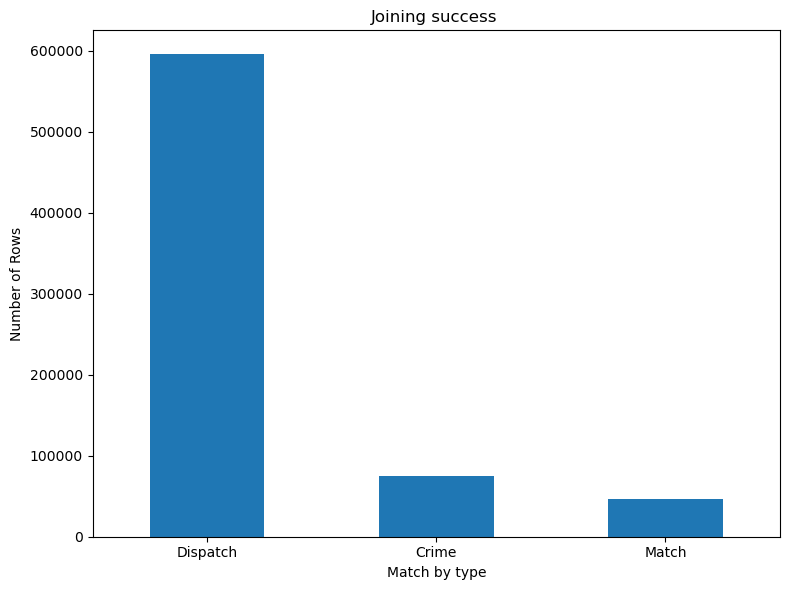

In [77]:
# Barplot to see how I did

match_counts = incidents['match_status'].value_counts()

plt.figure(figsize=(8, 6))
match_counts.plot(kind='bar')
plt.title('Joining success ')
plt.ylabel('Number of Rows')
plt.xlabel('Match by type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [78]:
# Merge is a little ugly, will get rid of it
alternative_merge['match_status'] = alternative_merge['_merge'].map({
    'both': 'Match',
    'left_only': 'Crime',
    'right_only': 'Dispatch'
    })


alternative_merge = alternative_merge.drop(columns=['_merge'])

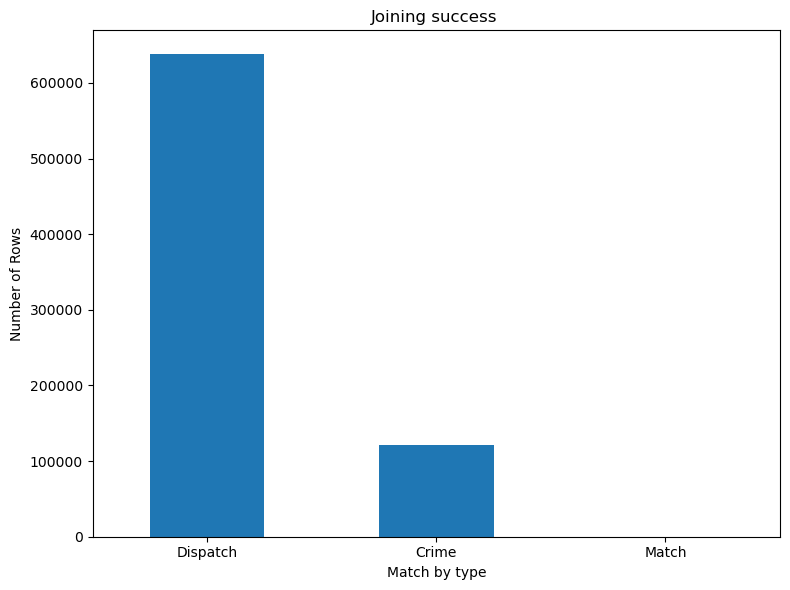

In [79]:
# Barplot to see how I did

match_alt = alternative_merge['match_status'].value_counts()

plt.figure(figsize=(8, 6))
match_alt.plot(kind='bar')
plt.title('Joining success ')
plt.ylabel('Number of Rows')
plt.xlabel('Match by type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Discussion of what is going on, and why there are so few matches

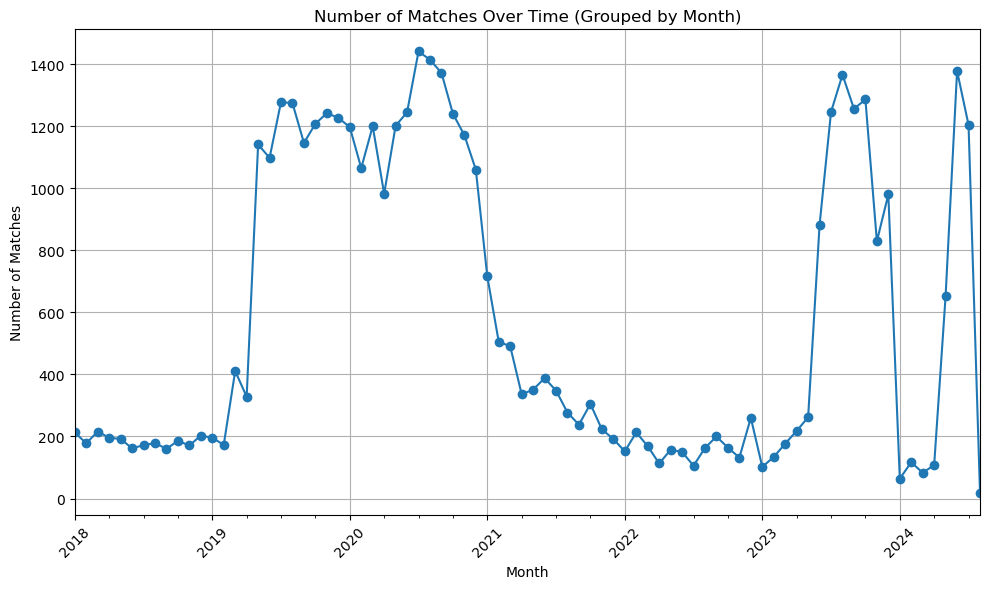

In [81]:
# I am curious if there is an difference in matches over time
incidents['month_year_crime'] = incidents['Start_Time_crime'].dt.to_period('M')
matches = incidents[incidents['match_status'] == 'Match']
monthly_matches = matches.groupby('month_year_crime').size()

plt.figure(figsize=(10, 6))
monthly_matches.plot(kind='line', marker='o')
plt.title('Number of Matches Over Time (Grouped by Month)')
plt.xlabel('Month')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


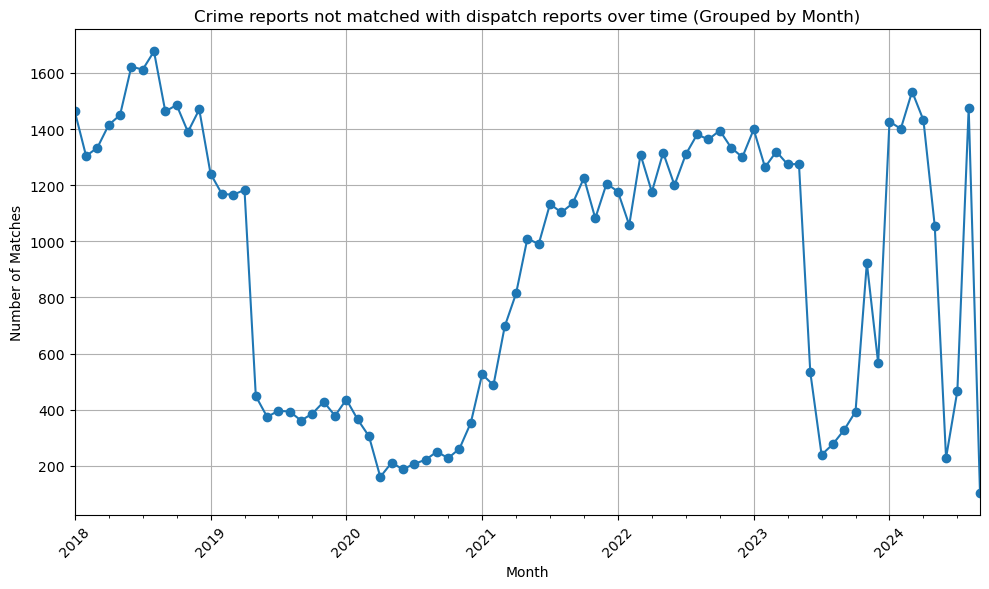

In [82]:
# I am curious if there is an difference in matches over time
in_crime = incidents[incidents['match_status'] == 'Crime']
monthly_crime = in_crime.groupby('month_year_crime').size()

plt.figure(figsize=(10, 6))
monthly_crime.plot(kind='line', marker='o')
plt.title('Crime reports not matched with dispatch reports over time (Grouped by Month)')
plt.xlabel('Month')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/vt/8zqwv5_51777lk_0p42g3sdr0000gn/T/ipykernel_39211/3428916921.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Figure size 1000x600 with 0 Axes>

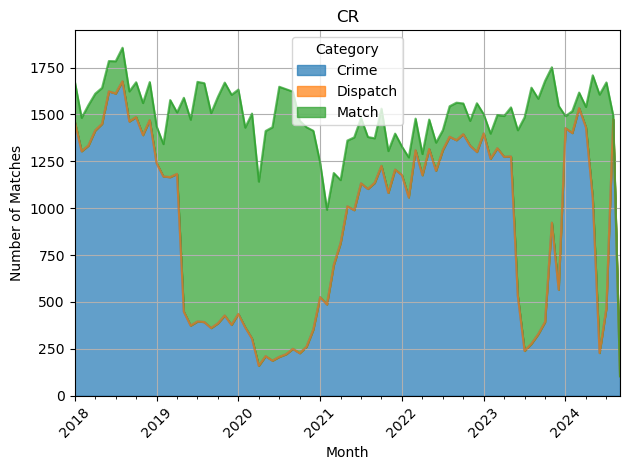

In [161]:
# Alluvial of match disparity in the crime data 
# Colours are horrendous, should be fixed
monthly_summary = (
    incidents.groupby(['month_year_crime', 'match_status'])
    .size()
    .unstack(fill_value=0)
    )


plt.figure(figsize=(10, 6))
monthly_summary.plot(kind='area', stacked = True, alpha = 0.7 )
plt.title("CR")
plt.xlabel('Month')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.grid(True)
plt.tight_layout()
plt.show()

# Investigating pipeline issues in the crime dataset. 

In [107]:
crime.columns

Index(['Incident_ID', 'Offence Code', 'ID', 'Dispatch_Time', 'Start_Time',
       'End_Time', 'Victims', 'Crime Name1', 'Crime Name2', 'Crime Name3',
       'Agency', 'Place', 'PRA', 'Latitude', 'Longitude',
       'Police District Number', 'WKT'],
      dtype='object')

In [135]:
crime_name1_summary.head(3)

Crime Name1,Crime Against Not a Crime,Crime Against Person,"Crime Against Person, Property, or Society",Crime Against Property,Crime Against Society
month_year,,,,,
2018-01,0,165,0,1135,376
2018-02,0,161,0,954,367
2018-03,0,156,0,991,403


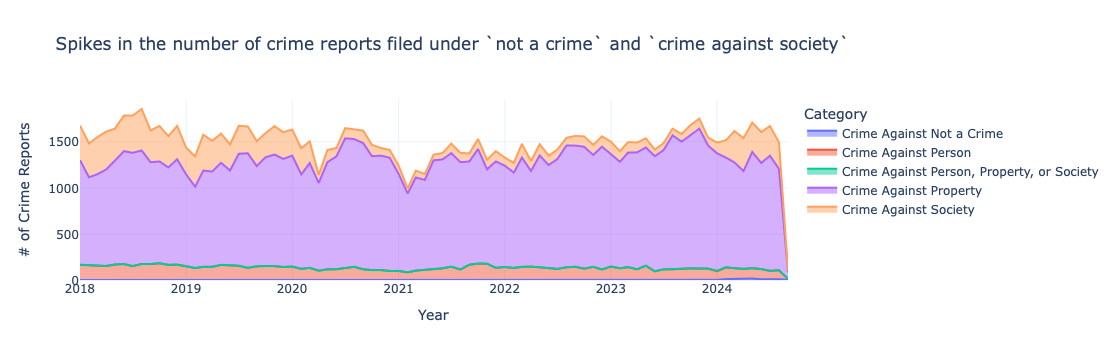

In [139]:
# Very close to final project. 
# The code here can be severed from the rest and made into a dashboard
# Now taking a closer look at the crime dataset, to see what is going on there

crime['month_year'] = crime['Start_Time'].dt.to_period('M')

crime_name1_summary = (
    crime.groupby(['month_year', 'Crime Name1'])
    .size()
    .unstack(fill_value=0)
    )
crime_name1_long = crime_name1_summary.reset_index().melt(
    id_vars='month_year',
    var_name='Crime Name1', 
    value_name='Count'
    )
crime_name1_long['month_year'] = crime_name1_long['month_year'].astype(str)

fig = px.area(
    crime_name1_long,
    x='month_year', 
    y='Count', 
    color='Crime Name1', 
    title="Spikes in the number of crime reports filed under `not a crime` and `crime against society`",
    labels={
        'Year_Month': 'Year-Month',
        'total_crimes_by_category': 'Total Number of Reports',
        'Crime_Short': 'Crime Category'
    }
    )
fig.update_layout(
    template='plotly_white',
    legend_title="Category",
    xaxis_title="Year",
    yaxis_title="# of Crime Reports" 
)
fig.show()

# It is in Runaways and All other Offences
Graph runaways, Motor vehicle theft, and All other offences 
against the above graph and placed into a dashboard. This call all be done with the crime dataset alone

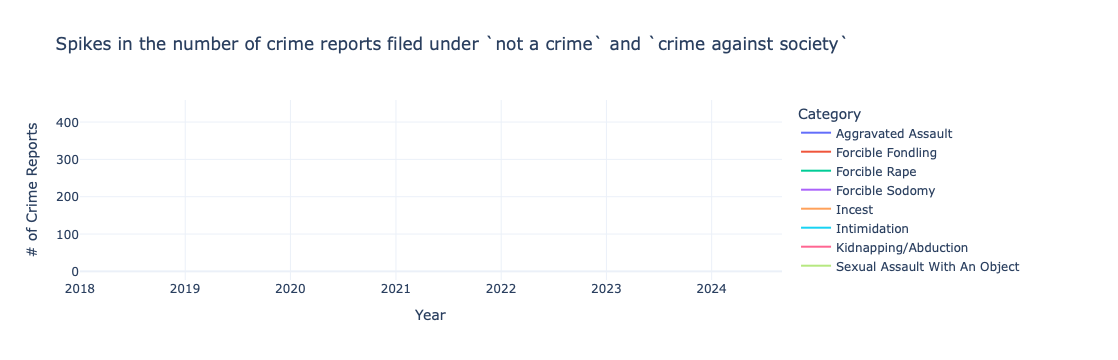

In [155]:
# Now exploring the specific categories by crime name 2 
crime['month_year'] = crime['Start_Time'].dt.to_period('M')

crime_name2_summary = (
    crime.groupby(['month_year','Crime Name1', 'Crime Name2'])
    .size()
    .reset_index(name='Count')
    )

crime_name2_summary['month_year'] = crime_name2_summary['month_year'].astype(str)



fig = px.line(
    crime_name2_summary,
    x='month_year', 
    y='Count', 
    color='Crime Name2', 
    # facet_col='Crime Name1',
    title="Spikes in the number of crime reports filed under `not a crime` and `crime against society`",
    labels={
        'Year_Month': 'Year-Month',
        'total_crimes_by_category': 'Total Number of Reports',
        'Crime_Short': 'Crime Sub-category'
        
    }
    )
fig.update_layout(
    template='plotly_white',
    legend_title="Category",
    xaxis_title="Year",
    yaxis_title="# of Crime Reports" 
)
fig.show()
# All Other Offenses 
# Runaways
# Motor vehicle theft

# 

In [165]:
print(crime_name2_summary)

     month_year             Crime Name1  \
0       2018-01    Crime Against Person   
1       2018-01    Crime Against Person   
2       2018-01    Crime Against Person   
3       2018-01    Crime Against Person   
4       2018-01    Crime Against Person   
...         ...                     ...   
3143    2024-09  Crime Against Property   
3144    2024-09   Crime Against Society   
3145    2024-09   Crime Against Society   
3146    2024-09   Crime Against Society   
3147    2024-09   Crime Against Society   

                                      Crime Name2  Count  
0                              Aggravated Assault     22  
1                               Forcible Fondling     17  
2                                   Forcible Rape      7  
3                                 Forcible Sodomy      6  
4                                          Incest      1  
...                                           ...    ...  
3143  Theft of Motor Vehicle Parts or Accessories      5  
3144       

# Matching columns and checking for errors 

In [96]:
print(len(incidents['ID']))
print(len(dispatch['ID']))
print(len(crime['ID']))

716043
637724
120689


The following coloumns should be synthesised 
> Police District Name - Police District Number_crime - Police District Number_dispatch ?
> WKT_dispatch - WKT_crime - distance between ?
> Start_Time_crime End_Time_crime - Start_Time_dispatch End_Time_dispatch

Remove: 
> Beat_dispatch                      164823
> PRA_dispatch                       164779
> Beat_crime                         557003
> PRA_crime                          557004
> Offence code 
> Disposition Desc                   164637
> CallTime CallRoute                 164677
> Calltime Dispatch                  190062
> Calltime Arrive                    315435
> Calltime Cleared                   164743
> CallRoute Dispatch                 190057
> Dispatch Arrive                    318475
> Arrive Cleared                     315465

In [167]:
# crime_name2_summary.to_csv('/Users/gimle/DATA-205-SETS/crime_ns2_dash.csv', index=False)

In [ ]:
# Save for use in dashboards
# dispatch.to_csv('/Users/gimle/DATA-205-SETS/dispatch_dash.csv', index=False)
# crime.to_csv('/Users/gimle/DATA-205-SETS/crime_dash.csv', index=False)
# incidents.to_csv('/Users/gimle/DATA-205-SETS/incidents_gis_ready.csv', index=False)